In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

In [2]:
def break_even(a, y_test):
    y_test.reset_index(drop=True, inplace=True) # インデックスリセット
    idx = a.argsort()[::-1] # 降順のインデックス計算

    n_total = len(y_test)
    n_anom = sum(y_test)
    n_norm = n_total - n_anom
    coverage = np.zeros(n_total) # 異常網羅率
    detection = np.zeros(n_total) # 正答率
    for i in range(n_total):
        n_detected_anom = sum(y_test[idx][:i])
        n_detected_norm = n_total - i - sum(y_test[idx][i:])
        coverage[i] = n_detected_anom / n_anom
        detection[i] = n_detected_norm / n_norm

    # プロット    
    plt.plot(a[idx], coverage, label='coverage')
    plt.plot(a[idx], detection, label='detection ratio')
    plt.xlabel('threshold')
    plt.xscale('log')
    plt.grid(which='major')
    plt.grid(which='minor')
    plt.legend()
    plt.show()

In [3]:
def anom_score(a, y_test):
    # 異常度
    plt.plot(np.where(y_test==0)[0], a[np.where(y_test==0)[0]], 'o', alpha=.4, ms=3)
    plt.plot(np.where(y_test!=0)[0], a[np.where(y_test!=0)[0]], 'o', color='r',  alpha=.4, ms=3)
    plt.show()

In [4]:
def gmm(X_train, X_test, n_components=5):
    gm = GaussianMixture(n_components=n_components, verbose=0, max_iter=1000, random_state=0)
    gm.fit(X_train)
    score = gm.score_samples(X_test)
    return score

# iris

In [5]:
# ファイル読み込み
in_file = 'data/iris.csv'
df = pd.read_csv(in_file, header=0, index_col=None, sep=',').sample(frac=1)

# Iris-virginicaの検出

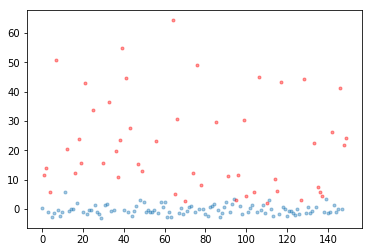

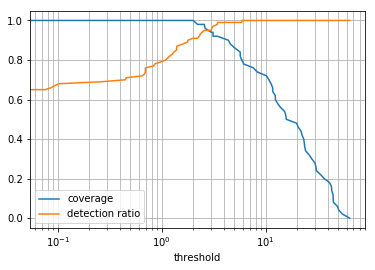

In [6]:
# データセットの作成
target = 'Iris-virginica'
target_col = 'class'
df_nontarget = df[df[target_col]!=target]
X_train = df_nontarget.drop(target_col, axis=1)
y_train = (df_nontarget[target_col]!=target).astype(np.int32)
X_test = df.drop(target_col, axis=1)
y_test = (df[target_col]==target).astype(np.int32)

# 混合分布作成
a = gmm(X_train, X_test)
anom_score(-a, y_test)
break_even(-a, y_test)

# setosa の検出

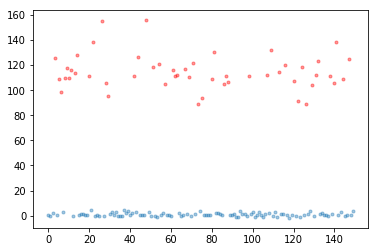

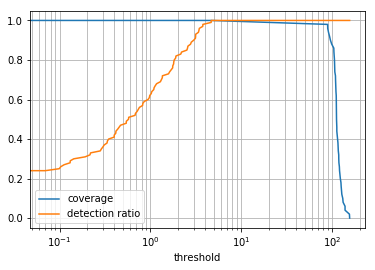

In [7]:
# データセットの作成
target = 'Iris-setosa'
target_col = 'class'
df_nontarget = df[df[target_col]!=target]
X_train = df_nontarget.drop(target_col, axis=1)
y_train = (df_nontarget[target_col]!=target).astype(np.int32)
X_test = df.drop(target_col, axis=1)
y_test = (df[target_col]==target).astype(np.int32)

# 混合分布作成
a = gmm(X_train, X_test)
anom_score(-a, y_test)
break_even(-a, y_test)

# versicolor の検出

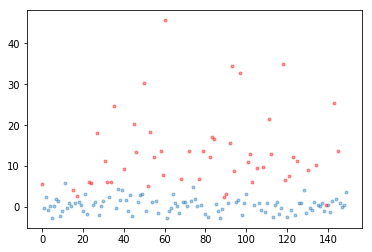

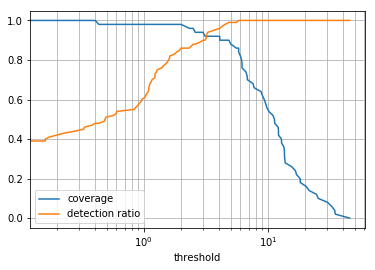

In [8]:
# データセットの作成
target = 'Iris-versicolor'
target_col = 'class'
df_nontarget = df[df[target_col]!=target]
X_train = df_nontarget.drop(target_col, axis=1)
y_train = (df_nontarget[target_col]!=target).astype(np.int32)
X_test = df.drop(target_col, axis=1)
y_test = (df[target_col]==target).astype(np.int32)

# 混合分布作成
a = gmm(X_train, X_test)
anom_score(-a, y_test)
break_even(-a, y_test)

# breast_cancer

In [9]:
# ファイル読み込み# ファイル読み 
in_file = 'data/breast_cancer.csv'
df = pd.read_csv(in_file, header=0, index_col='Sample code number', sep=',').sample(frac=1)

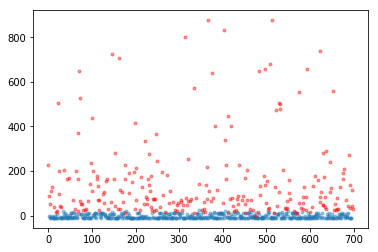

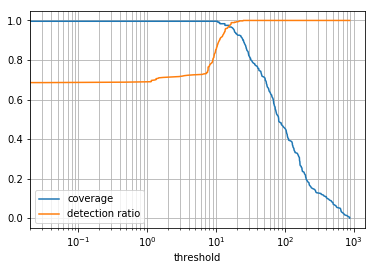

In [10]:
# データセットの作成
target = 4
target_col = 'Class'
df = df.replace('?', np.nan)
df = df.dropna(how='any', axis=1)
df_nontarget = df[df[target_col]!=target]
X_train = df_nontarget.drop(target_col, axis=1)
y_train = (df_nontarget[target_col]!=target).astype(np.int32)
X_test = df.drop(target_col, axis=1)
y_test = (df[target_col]==target).astype(np.int32)

# 混合分布作成
a = gmm(X_train, X_test)
anom_score(-a, y_test)
break_even(-a, y_test)

# breast_cancer_coimbra

In [11]:
# ファイル読み込み
in_file = 'data/breast_cancer_coimbra.csv'
df = pd.read_csv(in_file, header=0, index_col=None, sep=',').sample(frac=1)

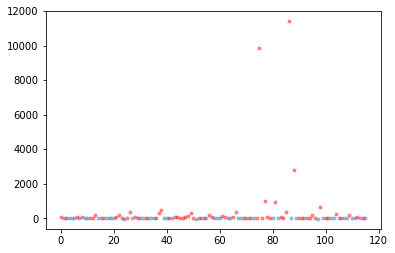

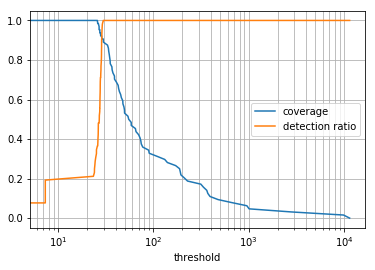

In [12]:
# データセットの作成
target = 2
target_col = 'Classification'
df_nontarget = df[df[target_col]!=target]
X_train = df_nontarget.drop(target_col, axis=1)
y_train = (df_nontarget[target_col]!=target).astype(np.int32)
X_test = df.drop(target_col, axis=1)
y_test = (df[target_col]==target).astype(np.int32)

# 混合分布作成
a = gmm(X_train, X_test)
anom_score(-a, y_test)
break_even(-a, y_test)

# Optical Recognition of Handwritten Digits Data set

In [13]:
# ファイル読み込み
in_file = 'data/digits.csv'
df = pd.read_csv(in_file, header=None, index_col=None, sep=',').sample(frac=1)

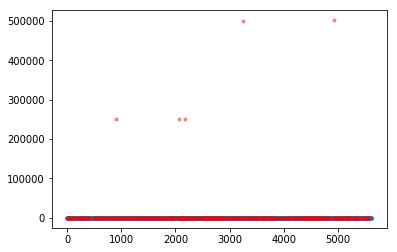

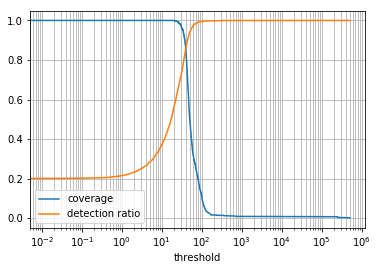

In [14]:
# データセットの作成
target = 1
target_col = 64

# 標準偏差が0の列を除く
std_cols = df.std()
expl_cols = np.array([l for l in df.columns if std_cols[l]!=0])
df_ext = df[expl_cols]

df_nontarget = df_ext[df_ext[target_col]!=target]
X_train = df_nontarget.drop(target_col, axis=1)
y_train = (df_nontarget[target_col]!=target).astype(np.int32)
X_test = df_ext.drop(target_col, axis=1)
y_test = (df_ext[target_col]==target).astype(np.int32)

# 混合分布作成
a = gmm(X_train, X_test, n_components=10)
anom_score(-a, y_test)
break_even(-a, y_test)